In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import datetime as dt
from scipy import stats

In [2]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os
import gc

In [3]:
#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### LOAD data

In [4]:
#Read dataset
traindemographics=pd.read_csv('/home/david/Desktop/loan/data/traindemographics.csv' ,parse_dates=['birthdate'])
testdemographics = pd.read_csv('/home/david/Desktop/loan/data/testdemographics.csv', parse_dates=['birthdate'])
trainperf = pd.read_csv('/home/david/Desktop/loan/data/trainperf.csv', parse_dates=['approveddate','creationdate'])
testperf = pd.read_csv('/home/david/Desktop/loan/data/testperf.csv',parse_dates=['approveddate','creationdate'])
trainprevloans= pd.read_csv('/home/david/Desktop/loan/data/trainprevloans.csv', parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])
testprevloans = pd.read_csv('/home/david/Desktop/loan/data/testprevloans.csv', parse_dates=['approveddate','creationdate','closeddate',
                                                                          'firstduedate','firstrepaiddate'])


### Data Dimension

In [5]:
# Check The Shape Of The Data Loaded
print('Test Demographic shape: {} Rows, {} Columns'.format(*trainperf.shape))
print('Test Performance shape: {} Rows, {} Columns'.format(*traindemographics.shape))
print('Test Previous Loan shape: {} Rows, {} Columns'.format(*trainprevloans.shape))
print('Train Demographic shape: {} Rows, {} Columns'.format(*testperf.shape))
print('Train Performance shape: {} Rows, {} Columns'.format(*testdemographics.shape))
print('Train Previous Loan shape: {} Rows, {} Columns'.format(*testprevloans.shape))

Test Demographic shape: 4368 Rows, 10 Columns
Test Performance shape: 4346 Rows, 9 Columns
Test Previous Loan shape: 18183 Rows, 12 Columns
Train Demographic shape: 1450 Rows, 9 Columns
Train Performance shape: 1487 Rows, 9 Columns
Train Previous Loan shape: 5907 Rows, 12 Columns


### First Few rows of Data

In [6]:
# Print First Few Rows Of The Data
display("test demographics")
display(testdemographics.head(3))
display("test performance")
display(testperf.head(3))
display("test previous loans")
display(testprevloans.head(3))
display("train demographics")
display(traindemographics.head(3))
display("train performance")
display(trainperf.head(3))
display("train previous loans")
display(trainprevloans.head(3))

'test demographics'

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28,Savings,5.30,7.59,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23,Savings,3.29,6.60,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04,Savings,8.50,7.73,First Bank,NaN,Permanent,NaN


'test performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,"12,250.00",30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,"44,000.00",30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,"24,500.00",30,NaN


'test previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,"10,000.00","13,000.00",30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,"30,000.00","36,800.00",60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,"30,000.00","34,400.00",30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46


'train demographics'

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.32,6.53,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.33,7.12,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.75,5.56,Fidelity Bank,NaN,NaN,NaN


'train performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,"30,000.00","34,500.00",30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,"15,000.00","17,250.00",30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,"20,000.00","22,250.00",15,NaN,Good


'train previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,"10,000.00","13,000.00",30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,"10,000.00","13,000.00",30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,"20,000.00","23,800.00",30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47


### 3 Data Exploration

### 3.1 Get first hand feeling of the data

#### 3.1.1 Column/Variable Names
##### Variable names of the data. You may create your own variable names

In [7]:
display("test demographics")
display(testdemographics.columns)
display("test performance")
display(testperf.columns)
display("test previous loans")
display(testprevloans.columns)
display("train demographics")
display(traindemographics.columns)
display("train performance")
display(trainperf.columns)
display("train previous loans")
display(trainprevloans.columns)

'test demographics'

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

'test performance'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby'],
      dtype='object')

'test previous loans'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

'train demographics'

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

'train performance'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

'train previous loans'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features.

In [8]:
# Number of each type of column
display("test demographics")
display(testdemographics.dtypes.value_counts())
display("test performance")
display(testperf.dtypes.value_counts())
display("test previous loans")
display(testprevloans.dtypes.value_counts())
display("train demographics")
display(traindemographics.dtypes.value_counts())
display("train performance")
display(trainperf.dtypes.value_counts())
display("train previous loans")
display(trainprevloans.dtypes.value_counts())

'test demographics'

object            6
float64           2
datetime64[ns]    1
dtype: int64

'test performance'

object     4
int64      4
float64    1
dtype: int64

'test previous loans'

datetime64[ns]    5
int64             3
float64           2
object            2
dtype: int64

'train demographics'

object            6
float64           2
datetime64[ns]    1
dtype: int64

'train performance'

int64             3
object            3
float64           2
datetime64[ns]    2
dtype: int64

'train previous loans'

datetime64[ns]    5
int64             3
float64           2
object            2
dtype: int64

### 3.1.2 Structure of the Data


Use pandas profiling to get summary details of each dataset



In [9]:
import pandas_profiling

In [10]:
profile = pandas_profiling.ProfileReport(testdemographics)
profile.to_file(outputfile="/home/david/Desktop/loan/html/testdemographics.html")

In [11]:
profile = pandas_profiling.ProfileReport(testperf)
profile.to_file(outputfile="/home/david/Desktop/loan/html/testperf.html")

In [12]:
profile = pandas_profiling.ProfileReport(testprevloans)
profile.to_file(outputfile="/home/david/Desktop/loan/html/testprevloans.html")

In [13]:
profile = pandas_profiling.ProfileReport(traindemographics)
profile.to_file(outputfile="/home/david/Desktop/loan/html/traindemographics.html")

In [14]:
profile = pandas_profiling.ProfileReport(trainperf)
profile.to_file(outputfile="/home/david/Desktop/loan/html/trainperf.html")

In [15]:
profile = pandas_profiling.ProfileReport(trainprevloans)
profile.to_file(outputfile="/home/david/Desktop/loan/html/trainprevloans.html")

### 4.0 Data Preparation

### 4.1 Merge the datasets

tag the data with a set column specifying whether its from train or test set



In [16]:
traindemographics['set'] = 'train'
testdemographics['set'] = 'test'
trainperf['set'] = 'train'
testperf['set'] = 'test'
trainprevloans['set'] = 'train'
testprevloans['set'] = 'test'

In [17]:
Tdemographics=pd.concat([traindemographics,testdemographics])
Tperfomance=pd.concat([trainperf,testperf])
Tprevious=pd.concat([trainprevloans,testprevloans])

### 4.2. Create the TARGET Variable

In [18]:
# Convert the good_bad_flag into numerical binary variable 
goodbad={'Good':1,'Bad':0}
Tperfomance.good_bad_flag=Tperfomance.good_bad_flag.map(goodbad)

In [19]:
Tperfomance.head()

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,set,systemloanid,termdays,totaldue
0,2017-07-25 08:22:56,2017-07-25 07:22:47,8a2a81a74ce8c05d014cfb32a0da1049,1.00,"30,000.00",12,NaN,train,301994762,30,"34,500.00"
1,2017-07-05 17:04:41,2017-07-05 16:04:18,8a85886e54beabf90154c0a29ae757c0,1.00,"15,000.00",2,NaN,train,301965204,30,"17,250.00"
2,2017-07-06 14:52:57,2017-07-06 13:52:51,8a8588f35438fe12015444567666018e,1.00,"20,000.00",7,NaN,train,301966580,15,"22,250.00"
3,2017-07-27 19:00:41,2017-07-27 18:00:35,8a85890754145ace015429211b513e16,1.00,"10,000.00",3,NaN,train,301999343,15,"11,500.00"
4,2017-07-03 23:42:45,2017-07-03 22:42:39,8a858970548359cc0154883481981866,1.00,"40,000.00",9,NaN,train,301962360,30,"44,000.00"


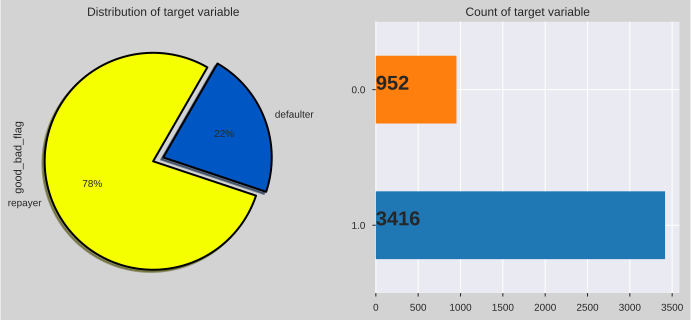

In [20]:
# Distribution of the target variable
%matplotlib inline
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
Tperfomance[Tperfomance['set'] == "train"]["good_bad_flag"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
                                                                             startangle = 60,
                                            labels=["repayer","defaulter"],wedgeprops={"linewidth":2,"edgecolor":"k"},
                                            explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = Tperfomance[Tperfomance['set'] == "train"]["good_bad_flag"].value_counts().plot(kind="barh")

for i,j in enumerate(Tperfomance[Tperfomance['set'] == "train"]["good_bad_flag"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

In [21]:
plt.show()

## 4.3 Missing Values


### 4.3.1 Percentage of Missing values in performance train and test data


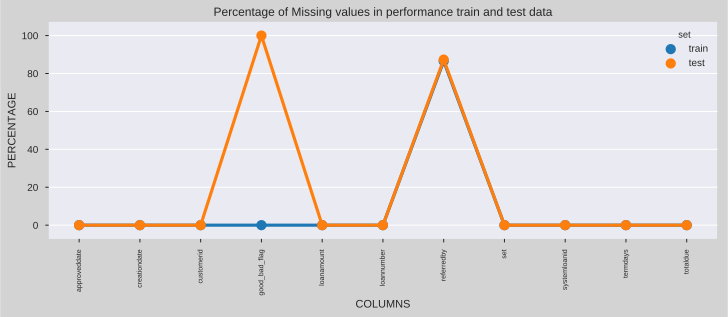

In [22]:
fig = plt.figure(figsize=(12,4))
miss_train = pd.DataFrame((Tperfomance[Tperfomance['set'] == "train"].isnull().sum())*100/Tperfomance[Tperfomance['set'] == "train"].shape[0]).reset_index()
miss_test  = pd.DataFrame((Tperfomance[Tperfomance['set'] == "test"].isnull().sum())*100/Tperfomance[Tperfomance['set'] == "test"].shape[0]).reset_index()
miss_train["set"] = "train"
miss_test["set"]  =  "test"
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot("index",0,data=missing,hue="set")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in performance train and test data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

### 4.3.2 Percentage of Missing values in other data sets


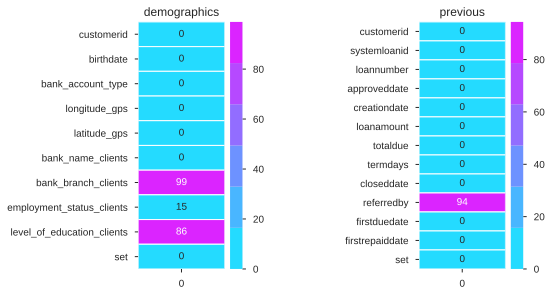

In [23]:
%matplotlib inline
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(Tdemographics.isnull().sum()/Tdemographics.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("demographics")

plt.subplot(232)
sns.heatmap(pd.DataFrame(Tprevious.isnull().sum()/Tprevious.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("previous")

plt.subplots_adjust(wspace = 1.6)

### 4.4 Feature Engineering


#### 4.4.1 Tdemographics


In [24]:
Tdemographics.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,set
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.32,6.53,GT Bank,NaN,NaN,NaN,train
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.33,7.12,Sterling Bank,NaN,Permanent,NaN,train
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.75,5.56,Fidelity Bank,NaN,NaN,NaN,train


In [25]:
Tdemographics.drop_duplicates(subset=Tdemographics.columns,keep='last', inplace=True)

#### 4.4.1.1 Age


In [26]:
Tdemographics['Age']=2018-Tdemographics.birthdate.dt.year #CREATE AGE 2018- BIRTHDATE

In [27]:
Tdemographics.Age=pd.cut(Tdemographics.Age,[0,13,31,51,100],labels=['ChildAge','YoungAge','MiddleAge','SeniorAge'])

### 4.4.1.2 bank_account_type (type of primary bank account)


In [28]:
Tdemographics["bank_account_type"].value_counts()

Savings    4570
Other      1168
Current      80
Name: bank_account_type, dtype: int64

In [29]:
Tdemographics["bank_account_type"] = Tdemographics["bank_account_type"].replace("Current", "Other")

In [30]:
Tdemographics["bank_account_type"].value_counts()

Savings    4570
Other      1248
Name: bank_account_type, dtype: int64

In [31]:
pd.crosstab(Tdemographics.employment_status_clients,Tdemographics.bank_account_type,margins=True).style.background_gradient(cmap='summer_r')

bank_account_type,Other,Savings,All
employment_status_clients,,,
Contract,1,1,2
Permanent,813,3392,4205
Retired,2,6,8
Self-Employed,322,148,470
Student,73,116,189
Unemployed,25,54,79
All,1236,3717,4953


### 4.4.1.3 level_of_education_clients


In [32]:
Tdemographics["level_of_education_clients"].value_counts()

Graduate         576
Secondary        118
Post-Graduate     90
Primary           11
Name: level_of_education_clients, dtype: int64

### 4.4.1.4 bank_name_clients


In [33]:
Tdemographics["bank_name_clients"].value_counts()

GT Bank               2128
First Bank             790
Access Bank            567
UBA                    461
Zenith Bank            412
Diamond Bank           392
EcoBank                202
Stanbic IBTC           193
FCMB                   168
Skye Bank              146
Fidelity Bank          139
Sterling Bank           67
Wema Bank               37
Union Bank              36
Heritage Bank           27
Keystone Bank           25
Standard Chartered      19
Unity Bank               9
Name: bank_name_clients, dtype: int64

high cardinality will drop the variable



In [34]:
Tdemographics["bank_branch_clients"].value_counts()

OGBA                                                             3
APAPA                                                            3
HEAD OFFICE                                                      3
OBA AKRAN                                                        3
OREGUN                                                           2
AJOSE ADEOGUN                                                    2
17, SANUSI FAFUNWA STREET, VICTORIA ISLAND, LAGOS                1
IKEJA                                                            1
STERLING BANK PLC 102, IJU ROAD, IFAKO BRANCH                    1
GBAGADA                                                          1
OBA ADEBIMPE                                                     1
47 LAGOS ROAD, IKORODU                                           1
MUSHIN BRANCH                                                    1
OGUDU, OJOTA                                                     1
ILUPEJU                                                       

high cardinality will drop the variable



### 4.4.1.6 employment_status_clients


In [35]:
Tdemographics["employment_status_clients"].value_counts()

Permanent        4205
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

#### 4.4.1.7 bank_name_clients


In [36]:
Tdemographics["bank_name_clients"].value_counts()

GT Bank               2128
First Bank             790
Access Bank            567
UBA                    461
Zenith Bank            412
Diamond Bank           392
EcoBank                202
Stanbic IBTC           193
FCMB                   168
Skye Bank              146
Fidelity Bank          139
Sterling Bank           67
Wema Bank               37
Union Bank              36
Heritage Bank           27
Keystone Bank           25
Standard Chartered      19
Unity Bank               9
Name: bank_name_clients, dtype: int64

Ok, there, the names will be useless to the algo, and replace them with digital is meaningless, and I do not want to binarize this variable, the cardinality is too great. So we will seek to characterize this variable with external data, such as liquidity ratios, blah (thanks to HB)



In [37]:
Liquidity_Ratio = pd.read_csv("/home/david/Desktop/loan/data/Nigerian_Banks_Liquidity_Ratio_Efficiency_Ratio_and_Profitability.csv", sep=";")

In [38]:
Liquidity_Ratio.head(3)

,S_N,Bank,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Loan_to_Asset
0,1,First Bank,0.10,0.01,1.12,0.96,0.89,0.08,0.65
1,2,UBA,0.10,0.01,1.04,0.93,0.49,0.33,0.34
2,3,Zenith Bank,0.09,0.03,1.12,0.93,0.64,0.14,0.47


That's it, we'll merge that with the basic dataset, using as the primary key the name of the banks



In [39]:
Tdemographics = pd.merge(Tdemographics, Liquidity_Ratio, how = 'left', left_on = 'bank_name_clients', right_on = 'Bank')

In [40]:
Tdemographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 20 columns):
customerid                    5818 non-null object
birthdate                     5818 non-null datetime64[ns]
bank_account_type             5818 non-null object
longitude_gps                 5818 non-null float64
latitude_gps                  5818 non-null float64
bank_name_clients             5818 non-null object
bank_branch_clients           65 non-null object
employment_status_clients     4953 non-null object
level_of_education_clients    795 non-null object
set                           5818 non-null object
Age                           5818 non-null category
S_N                           5579 non-null float64
Bank                          5579 non-null object
Return_On_Equity              5579 non-null float64
Return_On_Asset               5579 non-null float64
Current_Ratio                 5579 non-null float64
Liquid_to_asset_Ratio         5579 non-null float64
Loan_to_Depo

Flute, lines did not have girlfriends in the dataframe "Liquidity_Ratio" Let's check who it is



In [41]:
Tdemographics[Tdemographics["Current_Ratio"].isnull()]["bank_name_clients"].unique()

array(['FCMB', 'Standard Chartered', 'Heritage Bank', 'Keystone Bank'],
      dtype=object)

Yes, these 4 banks do not exist in the Liquidity_Ratio database, we will fill in the missing values ​​later



We take the opportunity to add another table to characterize banks, it's always nice



In [42]:
data_deposit = pd.read_csv("/home/david/Desktop/loan/data/Data_25_deposit_commercial_banks_Nigeria_2005.csv", sep=";")

In [43]:
data_deposit.head(3)

,Bank names,Status,Time,Merger,Age,Revenue,Asset
0,Access Bank,0,10,0,26,258.00,"2,590.00"
1,AfribankPlc*,1,7,0,52,0.24,"1,010.00"
2,Diamond Bank,0,10,1,25,6.22,"1,750.00"


In [44]:
Tdemographics = pd.merge(Tdemographics, data_deposit, how = 'left', left_on = 'bank_name_clients', right_on = 'Bank names')
Tdemographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 27 columns):
customerid                    5818 non-null object
birthdate                     5818 non-null datetime64[ns]
bank_account_type             5818 non-null object
longitude_gps                 5818 non-null float64
latitude_gps                  5818 non-null float64
bank_name_clients             5818 non-null object
bank_branch_clients           65 non-null object
employment_status_clients     4953 non-null object
level_of_education_clients    795 non-null object
set                           5818 non-null object
Age_x                         5818 non-null category
S_N                           5579 non-null float64
Bank                          5579 non-null object
Return_On_Equity              5579 non-null float64
Return_On_Asset               5579 non-null float64
Current_Ratio                 5579 non-null float64
Liquid_to_asset_Ratio         5579 non-null float64
Loan_to_Depo

In [45]:
Tdemographics[Tdemographics["Age_y"].isnull()]["bank_name_clients"].unique()

array(['Stanbic IBTC', 'Heritage Bank', 'Keystone Bank'], dtype=object)

Still these three banks that are missing, we will manage that later. In the meantime, we move on



In [46]:
Tdemographics.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,set,Age_x,S_N,Bank,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Loan_to_Asset,Bank names,Status,Time,Merger,Age_y,Revenue,Asset
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.32,6.53,GT Bank,NaN,NaN,NaN,train,MiddleAge,4.00,GT Bank,0.24,0.04,0.99,0.82,0.71,0.32,0.47,GT Bank,0.00,10.00,0.00,25.00,280.10,"2,520.00"
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.33,7.12,Sterling Bank,NaN,Permanent,NaN,train,MiddleAge,8.00,Sterling Bank,0.16,0.01,0.81,0.74,0.46,0.11,0.36,Sterling Bank,0.00,10.00,1.00,56.00,130.60,799.50
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.75,5.56,Fidelity Bank,NaN,NaN,NaN,train,YoungAge,7.00,Fidelity Bank,0.07,0.01,1.24,0.93,0.79,0.13,0.56,Fidelity Bank,0.00,10.00,0.00,27.00,146.90,"1,232.00"


In [47]:
Tdemographics.drop(columns=['bank_name_clients','bank_branch_clients','birthdate','Bank','Bank names'],axis=1,inplace=True)

### 4.4.2 Tprevious


In [48]:
Tprevious.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,set
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,"10,000.00","13,000.00",30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43,train
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,"10,000.00","13,000.00",30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00,train
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,"20,000.00","23,800.00",30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47,train


### 4.4.2.1 Profit


In [49]:
Tprevious['profit']=Tprevious['totaldue']-Tprevious['loanamount']

### 4.4.2.2 Return Days


In [50]:
Tprevious['return_days']=Tprevious.closeddate-Tprevious.approveddate
Tprevious['return_days']=Tprevious['return_days'].apply(lambda x:int(str(x)[:2]))

### 4.4.2.3 Days Left


In [51]:
Tprevious['days_left']=Tprevious.termdays-Tprevious.return_days

### 4.4.2.4 Features Extracted


In [52]:
#Totalprofit
Totalprofit=Tprevious.pivot_table(values='profit',index='customerid',aggfunc=sum)
Totalprofit.rename(columns={'profit':'Totalprofit'},inplace=True)

#Avgprofit
Avgprofit=Tprevious.pivot_table(values='profit',index='customerid',aggfunc=np.mean)
Avgprofit.rename(columns={'profit':'Avgprofit'},inplace=True)

#Avgloanamount
Avgloanamount=Tprevious.pivot_table(values='loanamount',index='customerid',aggfunc=np.mean)
Avgloanamount.rename(columns={'loanamount':'Avgloanamount'},inplace=True)

#Avgtermdays
Avgtermdays=Tprevious.pivot_table(values='termdays',index='customerid',aggfunc=np.mean)
Avgtermdays.rename(columns={'termdays':'Avgtermdays'},inplace=True)

#earlypayment
earlypayment=Tprevious.pivot_table(values='days_left',index='customerid',aggfunc=lambda x:(x>=0).sum())
earlypayment.rename(columns={'days_left':'earlypayment'},inplace=True)

#Avgdaysleft
Avgdaysleft=Tprevious.pivot_table(values='days_left',index='customerid',aggfunc=np.mean)
Avgdaysleft.rename(columns={'days_left':'Avgdaysleft'},inplace=True)

In [53]:
data=[Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment]

In [54]:
data=data[0].join(data[1:])

In [55]:
data.head(3)

,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment
customerid,,,,,,
8a1088a0484472eb01484669e3ce4e0b,"1,500.00","1,500.00","10,000.00",15.00,-7.00,0
8a1a1e7e4f707f8b014f797718316cad,"19,500.00","4,875.00","17,500.00",37.50,6.25,3
8a1a32fc49b632520149c3b8fdf85139,"16,500.00","2,357.14","12,857.14",19.29,1.00,6


### 4.4.3 Tperfomance


In [56]:
Tperfomance.head(3)

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,set,systemloanid,termdays,totaldue
0,2017-07-25 08:22:56,2017-07-25 07:22:47,8a2a81a74ce8c05d014cfb32a0da1049,1.00,"30,000.00",12,NaN,train,301994762,30,"34,500.00"
1,2017-07-05 17:04:41,2017-07-05 16:04:18,8a85886e54beabf90154c0a29ae757c0,1.00,"15,000.00",2,NaN,train,301965204,30,"17,250.00"
2,2017-07-06 14:52:57,2017-07-06 13:52:51,8a8588f35438fe12015444567666018e,1.00,"20,000.00",7,NaN,train,301966580,15,"22,250.00"


### 4.4.3.1 Profit


In [57]:
Tperfomance['new_profit']=Tperfomance['totaldue']-Tperfomance['loanamount']

In [58]:
Tperfomance.drop(columns=['systemloanid','referredby','creationdate','approveddate','totaldue'],inplace=True)

### 4.4.3.2. loanamount,loannumber


In [59]:
print('Highest loan amount is:', Tperfomance['loanamount'].max())
print('Lowest loan amount is:', Tperfomance['loanamount'].min())
print('Average loan amount is:', Tperfomance['loanamount'].mean())
print('Median loan amount is:', Tperfomance['loanamount'].median())

Highest loan amount is: 60000.0
Lowest loan amount is: 10000.0
Average loan amount is: 17727.74149192162
Median loan amount is: 10000.0


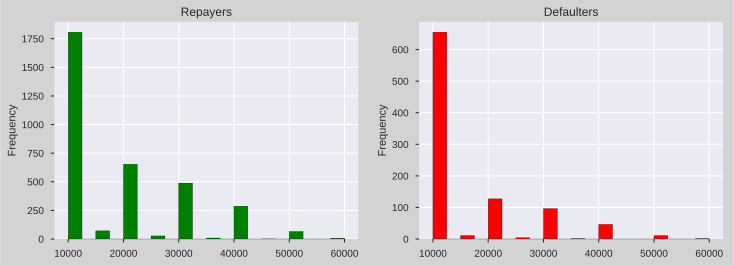

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
Tperfomance[Tperfomance['good_bad_flag'] == 1].loanamount.plot.hist(
    ax=ax[0], bins=20, edgecolor='black', color='green')
ax[0].set_title('Repayers')
Tperfomance[Tperfomance['good_bad_flag'] == 0].loanamount.plot.hist(
    ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('Defaulters')
fig.set_facecolor("lightgrey")
plt.show()

In [61]:
print('Highest loan number is:', Tperfomance['loannumber'].max())
print('Lowest loan number is:', Tperfomance['loannumber'].min())
print('Average loan number is:', Tperfomance['loannumber'].mean())
print('Median loan number is:', Tperfomance['loannumber'].median())

Highest loan number is: 34
Lowest loan number is: 2
Average loan number is: 5.151598487452733
Median loan number is: 4.0


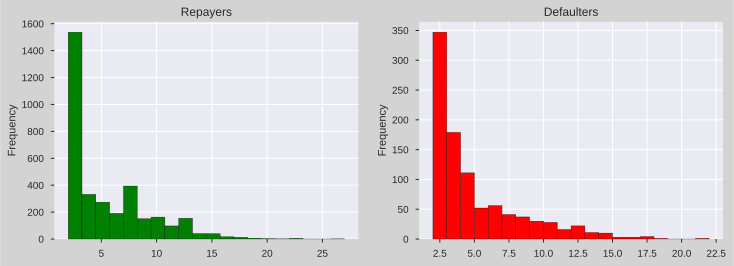

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
Tperfomance[Tperfomance['good_bad_flag'] == 1].loannumber.plot.hist(
    ax=ax[0], bins=20, edgecolor='black', color='green')
ax[0].set_title('Repayers')
Tperfomance[Tperfomance['good_bad_flag'] == 0].loannumber.plot.hist(
    ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('Defaulters')
fig.set_facecolor("lightgrey")
plt.show()

## 4.5 Merge the dataset


In [63]:
#merge data which has attributes from previous loans to performance data
data=pd.merge(data.reset_index(),Tperfomance,how='outer',on='customerid')

In [64]:
data.head(3)

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,set,termdays,new_profit
0,8a1088a0484472eb01484669e3ce4e0b,"1,500.00","1,500.00","10,000.00",15.00,-7.00,0.00,0.00,"10,000.00",2,train,15,"1,500.00"
1,8a1a1e7e4f707f8b014f797718316cad,"19,500.00","4,875.00","17,500.00",37.50,6.25,3.00,1.00,"30,000.00",5,train,60,"9,000.00"
2,8a1a32fc49b632520149c3b8fdf85139,"16,500.00","2,357.14","12,857.14",19.29,1.00,6.00,1.00,"20,000.00",8,train,30,"4,500.00"


In [65]:
data['loanamountdeviation']=data.Avgloanamount-data.loanamount
data['profitdeviation']=data.Avgprofit-data.new_profit
data['termdaysdeviation']=data.Avgtermdays-data.termdays

In [66]:
#merge data which has attributes from previous & performance loans to demographics data
data=pd.merge(data,Tdemographics,on='customerid',how='inner')

In [67]:
data.drop(columns=['set_x','set_y'],inplace=True)

In [68]:
data.shape

(5818, 35)

really dont know how to use longitude and latitude. i will drop it



In [69]:
cols=[x for x in data.columns if x not in ['longitude_gps','latitude_gps']]
data=data[cols]

In [70]:
#export the data
data.to_csv('/home/david/Desktop/loan/data/interim/feature_matrix.csv', index=False)

### 5. Feature Selection


5.1 Correlation


In [71]:
#calculate corelations
correlation =  data.corr()
correlation.to_csv('/home/david/Desktop/loan/data/interim/correlations_spec.csv')
### csv saved 

In [72]:
correlations = pd.read_csv('/home/david/Desktop/loan/data/interim/correlations_spec.csv', index_col =0)
correlations.index.name = 'Variable'
correlations.head()

,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Loan_to_Asset,Status,Time,Merger,Age_y,Revenue,Asset
Variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Totalprofit,1.00,0.66,0.92,0.43,0.18,0.90,0.09,0.86,0.94,0.53,0.53,-0.71,-0.24,-0.32,-0.02,0.00,-0.01,0.00,0.00,0.02,0.02,0.01,-0.00,nan,0.01,0.00,-0.03,0.00
Avgprofit,0.66,1.00,0.61,0.93,0.22,0.47,0.05,0.54,0.46,0.60,0.55,-0.43,-0.06,-0.05,-0.01,-0.00,-0.01,0.00,-0.00,-0.00,0.02,-0.01,-0.00,nan,0.01,-0.01,-0.03,-0.02
Avgloanamount,0.92,0.61,1.00,0.33,0.21,0.86,0.10,0.89,0.85,0.48,0.50,-0.70,-0.23,-0.33,-0.01,0.00,-0.01,0.01,0.01,0.03,0.01,0.02,-0.00,nan,0.00,0.01,-0.03,0.01
Avgtermdays,0.43,0.93,0.33,1.00,0.19,0.23,0.02,0.29,0.22,0.53,0.41,-0.23,0.07,0.08,0.00,-0.00,-0.02,-0.00,-0.00,-0.02,0.02,-0.02,-0.00,nan,0.01,-0.02,-0.03,-0.03
Avgdaysleft,0.18,0.22,0.21,0.19,1.00,0.29,0.24,0.23,0.12,0.20,0.17,-0.22,-0.07,-0.10,-0.01,0.01,0.01,0.02,0.01,0.02,0.02,0.00,-0.01,nan,0.01,0.00,-0.03,0.01


In [73]:
#correlation with target
correlations_target = correlations.sort_values('good_bad_flag')['good_bad_flag']
# Most negative correlations
correlations_target.head(5)

Variable
loanamountdeviation   -0.11
Revenue               -0.03
Return_On_Equity      -0.02
Age_y                 -0.01
profitdeviation       -0.01
Name: good_bad_flag, dtype: float64

In [74]:
# Most positive correlations
correlations_target.dropna().tail(5)

Variable
Avgloanamount   0.10
loanamount      0.12
earlypayment    0.15
Avgdaysleft     0.24
good_bad_flag   1.00
Name: good_bad_flag, dtype: float64

#### Visualize Distribution of Correlated Variables


In [75]:
features_sample = pd.read_csv('/home/david/Desktop/loan/data/interim/feature_matrix.csv')
features_sample['good_bad_flag'] = features_sample['good_bad_flag'].fillna(-1).astype(int)
features_sample.head(3)

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,employment_status_clients,level_of_education_clients,Age_x,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Loan_to_Asset,Status,Time,Merger,Age_y,Revenue,Asset
0,8a1088a0484472eb01484669e3ce4e0b,"1,500.00","1,500.00","10,000.00",15.00,-7.00,0.00,0,"10,000.00",2,15,"1,500.00",0.00,0.00,0.00,Savings,Permanent,Primary,YoungAge,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.47,0.00,10.00,0.00,25.00,280.10,"2,520.00"
1,8a1a1e7e4f707f8b014f797718316cad,"19,500.00","4,875.00","17,500.00",37.50,6.25,3.00,1,"30,000.00",5,60,"9,000.00","-12,500.00","-4,125.00",-22.50,Other,Permanent,Graduate,MiddleAge,nan,nan,nan,nan,nan,nan,nan,nan,0.00,10.00,1.00,16.00,2.10,12.00
2,8a1a32fc49b632520149c3b8fdf85139,"16,500.00","2,357.14","12,857.14",19.29,1.00,6.00,1,"20,000.00",8,30,"4,500.00","-7,142.86","-2,142.86",-10.71,Savings,Permanent,Graduate,MiddleAge,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.47,0.00,10.00,0.00,25.00,280.10,"2,520.00"


In [76]:
def kde_target_plot(df, feature):
    """Kernel density estimate plot of a feature colored
    by value of the target."""
    
    # Need to reset index for loc to workBU
    df = df.reset_index()
    plt.figure(figsize = (10, 6))
    plt.style.use('fivethirtyeight')
    
    # plot repaid loans
    sns.kdeplot(df.loc[df['good_bad_flag'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['good_bad_flag'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of Feature by Target Value')
    plt.xlabel('%s' % feature); 
    plt.ylabel('Density');
    plt.show()

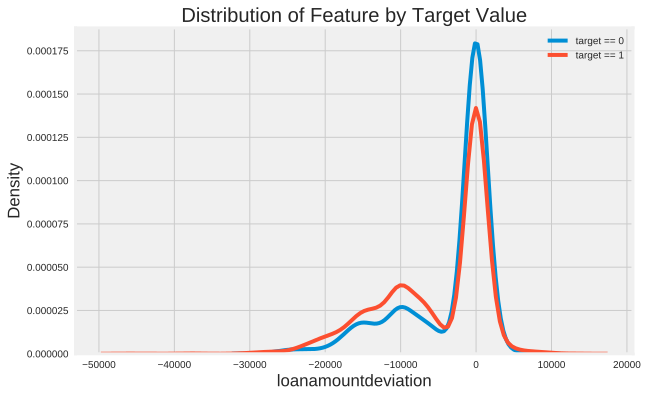

In [77]:
kde_target_plot(features_sample, feature = 'loanamountdeviation')

### collinear features


In [78]:
threshold = 0.9

correlated_pairs = {}

# Iterate through the columns
for col in correlations:
    # Find correlations above the threshold
    above_threshold_vars = [x for x in list(correlations.index[correlations[col] > threshold]) if x != col]
    correlated_pairs[col] = above_threshold_vars

In [79]:
correlated_pairs['Avgloanamount']

['Totalprofit']

In [80]:
correlations['Avgloanamount'].sort_values(ascending=False).head()

Variable
Avgloanamount   1.00
Totalprofit     0.92
loanamount      0.89
earlypayment    0.86
loannumber      0.85
Name: Avgloanamount, dtype: float64

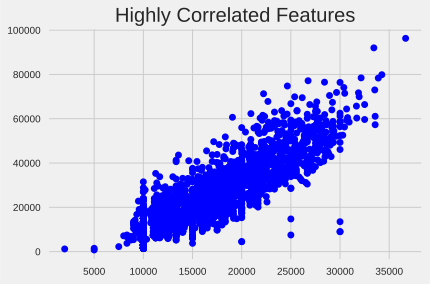

In [81]:
plt.plot(features_sample['Avgloanamount'], features_sample['Totalprofit'], 'bo')
plt.title('Highly Correlated Features');

### drop correlated features


In [82]:
# Upper triangle of correlations
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
upper.head()

,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Loan_to_Asset,Status,Time,Merger,Age_y,Revenue,Asset
Variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Totalprofit,nan,0.66,0.92,0.43,0.18,0.90,0.09,0.86,0.94,0.53,0.53,-0.71,-0.24,-0.32,-0.02,0.00,-0.01,0.00,0.00,0.02,0.02,0.01,-0.00,nan,0.01,0.00,-0.03,0.00
Avgprofit,nan,nan,0.61,0.93,0.22,0.47,0.05,0.54,0.46,0.60,0.55,-0.43,-0.06,-0.05,-0.01,-0.00,-0.01,0.00,-0.00,-0.00,0.02,-0.01,-0.00,nan,0.01,-0.01,-0.03,-0.02
Avgloanamount,nan,nan,nan,0.33,0.21,0.86,0.10,0.89,0.85,0.48,0.50,-0.70,-0.23,-0.33,-0.01,0.00,-0.01,0.01,0.01,0.03,0.01,0.02,-0.00,nan,0.00,0.01,-0.03,0.01
Avgtermdays,nan,nan,nan,nan,0.19,0.23,0.02,0.29,0.22,0.53,0.41,-0.23,0.07,0.08,0.00,-0.00,-0.02,-0.00,-0.00,-0.02,0.02,-0.02,-0.00,nan,0.01,-0.02,-0.03,-0.03
Avgdaysleft,nan,nan,nan,nan,nan,0.29,0.24,0.23,0.12,0.20,0.17,-0.22,-0.07,-0.10,-0.01,0.01,0.01,0.02,0.01,0.02,0.02,0.00,-0.01,nan,0.01,0.00,-0.03,0.01


In [83]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 5 columns to remove.


In [84]:
to_drop

['Avgloanamount', 'Avgtermdays', 'earlypayment', 'loannumber', 'Loan_to_Asset']

In [85]:
#columns to drop
features_sample = features_sample.drop(columns = to_drop)
print('data shape: ', features_sample.shape)

data shape:  (5818, 28)


## 5.2 Feature Selection through Feature Importances


We will use a Gradient Boosted Model from the LightGBM library to assess feature importances.

Since the LightGBM model does not need missing values to be imputed, we can directly fit on the training data. We will use Early Stopping to determine the optimal number of iterations and run the model twice, averaging the feature importances to try and avoid overfitting to a certain set of features.

In [86]:
features_sample.tail(3)

,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,employment_status_clients,level_of_education_clients,Age_x,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset
5815,8a858e9f59d692440159da2c60b42106,nan,nan,nan,-1,"20,000.00",30,"3,000.00",nan,nan,nan,Savings,Permanent,Graduate,MiddleAge,2.00,0.10,0.01,1.04,0.93,0.49,0.33,0.00,10.00,1.00,66.00,247.20,"2,750.00"
5816,8a858f0d58a18ebc0158a9bf124b5a30,nan,nan,nan,-1,"10,000.00",15,"1,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00"
5817,8a85890253e2f1180153eae33e5e6bc3,nan,nan,nan,-1,"20,000.00",30,"4,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00"


In [87]:
feature_sample2 = features_sample.copy(deep=True)

In [88]:
feature_sample2.tail(3)

,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,employment_status_clients,level_of_education_clients,Age_x,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset
5815,8a858e9f59d692440159da2c60b42106,nan,nan,nan,-1,"20,000.00",30,"3,000.00",nan,nan,nan,Savings,Permanent,Graduate,MiddleAge,2.00,0.10,0.01,1.04,0.93,0.49,0.33,0.00,10.00,1.00,66.00,247.20,"2,750.00"
5816,8a858f0d58a18ebc0158a9bf124b5a30,nan,nan,nan,-1,"10,000.00",15,"1,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00"
5817,8a85890253e2f1180153eae33e5e6bc3,nan,nan,nan,-1,"20,000.00",30,"4,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00"


### dummify the variables



In [89]:
feature_sample2.tail(3)

,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,employment_status_clients,level_of_education_clients,Age_x,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset
5815,8a858e9f59d692440159da2c60b42106,nan,nan,nan,-1,"20,000.00",30,"3,000.00",nan,nan,nan,Savings,Permanent,Graduate,MiddleAge,2.00,0.10,0.01,1.04,0.93,0.49,0.33,0.00,10.00,1.00,66.00,247.20,"2,750.00"
5816,8a858f0d58a18ebc0158a9bf124b5a30,nan,nan,nan,-1,"10,000.00",15,"1,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00"
5817,8a85890253e2f1180153eae33e5e6bc3,nan,nan,nan,-1,"20,000.00",30,"4,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00"


In [90]:
#Dummify the variables
feature_sample2 = pd.get_dummies(feature_sample2, columns=['bank_account_type', 'employment_status_clients','level_of_education_clients',
                                                           'Age_x'], drop_first=True, prefix=['bank_account_type', 
                                                                                              'employment_status_clients',
                                                                                              'level_of_education_clients','Age_x'])

In [91]:
feature_sample2.tail(3)

,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
5815,8a858e9f59d692440159da2c60b42106,nan,nan,nan,-1,"20,000.00",30,"3,000.00",nan,nan,nan,2.00,0.10,0.01,1.04,0.93,0.49,0.33,0.00,10.00,1.00,66.00,247.20,"2,750.00",1,1,0,0,0,0,0,0,0,0,0
5816,8a858f0d58a18ebc0158a9bf124b5a30,nan,nan,nan,-1,"10,000.00",15,"1,500.00",nan,nan,nan,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00",1,1,0,0,0,0,0,0,0,0,1
5817,8a85890253e2f1180153eae33e5e6bc3,nan,nan,nan,-1,"20,000.00",30,"4,500.00",nan,nan,nan,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,0,0,0,1


In [92]:
train=feature_sample2[(feature_sample2['good_bad_flag'] == 1) | (feature_sample2['good_bad_flag'] == 0)]

In [93]:
test=feature_sample2[feature_sample2['good_bad_flag'] < 0]

In [94]:
print(train.shape)
print(test.shape)

(4368, 35)
(1450, 35)


In [95]:
display(train.head(3))
display(test.head(3))

,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
0,8a1088a0484472eb01484669e3ce4e0b,"1,500.00","1,500.00",-7.00,0,"10,000.00",15,"1,500.00",0.00,0.00,0.00,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,1,0,0,1
1,8a1a1e7e4f707f8b014f797718316cad,"19,500.00","4,875.00",6.25,1,"30,000.00",60,"9,000.00","-12,500.00","-4,125.00",-22.50,nan,nan,nan,nan,nan,nan,nan,0.00,10.00,1.00,16.00,2.10,12.00,0,1,0,0,0,0,0,0,0,0,0
2,8a1a32fc49b632520149c3b8fdf85139,"16,500.00","2,357.14",1.00,1,"20,000.00",30,"4,500.00","-7,142.86","-2,142.86",-10.71,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,0,0,0,0


,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
6,8a28afc7474813a40147639ec637156b,"32,900.00","3,290.00",6.00,-1,"25,000.00",30,"2,500.00","-7,200.00",790.00,1.50,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",0,1,0,0,0,0,0,0,0,0,0
12,8a3735d5518aba7301518ac34413010d,"18,000.00","3,000.00",13.33,-1,"20,000.00",30,"4,500.00","-8,333.33","-1,500.00",-2.50,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",0,1,0,0,0,0,0,0,0,0,0
18,8a76e7d443e6e97c0143ed099d102b1d,"3,000.00","1,500.00",1.50,-1,"20,000.00",30,"4,500.00","-10,000.00","-3,000.00",-15.00,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00",0,1,0,0,0,0,0,0,0,0,0


In [96]:
#rename good_bad
train.rename(columns={'good_bad_flag': 'TARGET'}, inplace=True)
test.rename(columns={'good_bad_flag': 'TARGET'}, inplace=True)

In [97]:
#drop traget column in test
test.drop('TARGET', axis=1, inplace=True)

In [98]:
print(train.shape)
print(test.shape)

(4368, 35)
(1450, 34)


In [99]:
train_labels = train['TARGET']
train_ids = train['customerid']
test_ids = test['customerid']

In [100]:
#remove the customerid
columns = ['customerid']
test.drop(columns, inplace=True, axis=1)
train.drop(columns, inplace=True, axis=1)

In [101]:
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (4368, 34)
Testing shape:  (1450, 33)


# We align the dataframes by the columns. This ensures we have the same columns in the training and testing datasets.



In [102]:
#We align the dataframes by the columns. This ensures we have the same columns in the training and testing datasets
#Match the columns in the dataframes
train, test = train.align(test, join = 'inner', axis = 1)
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (4368, 33)
Testing shape:  (1450, 33)


In [103]:
display(train.head(3))
display(test.head(3))

,Totalprofit,Avgprofit,Avgdaysleft,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
0,"1,500.00","1,500.00",-7.00,"10,000.00",15,"1,500.00",0.00,0.00,0.00,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,1,0,0,1
1,"19,500.00","4,875.00",6.25,"30,000.00",60,"9,000.00","-12,500.00","-4,125.00",-22.50,nan,nan,nan,nan,nan,nan,nan,0.00,10.00,1.00,16.00,2.10,12.00,0,1,0,0,0,0,0,0,0,0,0
2,"16,500.00","2,357.14",1.00,"20,000.00",30,"4,500.00","-7,142.86","-2,142.86",-10.71,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,0,0,0,0


,Totalprofit,Avgprofit,Avgdaysleft,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
6,"32,900.00","3,290.00",6.00,"25,000.00",30,"2,500.00","-7,200.00",790.00,1.50,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",0,1,0,0,0,0,0,0,0,0,0
12,"18,000.00","3,000.00",13.33,"20,000.00",30,"4,500.00","-8,333.33","-1,500.00",-2.50,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",0,1,0,0,0,0,0,0,0,0,0
18,"3,000.00","1,500.00",1.50,"20,000.00",30,"4,500.00","-10,000.00","-3,000.00",-15.00,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00",0,1,0,0,0,0,0,0,0,0,0


## 5.3.1 Feature Importance

In [104]:
# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [105]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [106]:
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.3, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.674211	valid_0's binary_logloss: 0.618515
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[13]	valid_0's auc: 0.679206	valid_0's binary_logloss: 0.61925


In [107]:
# Make sure to average feature importances! 
x = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(train.columns), 
                                    'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
2,Avgdaysleft,147.00
0,Totalprofit,91.00
7,profitdeviation,63.00
1,Avgprofit,52.00
6,loanamountdeviation,36.00


In [108]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 6 features with 0.0 importance


,feature,importance
24,employment_status_clients_Retired,0.00
29,level_of_education_clients_Primary,0.00
17,Time,0.00
31,Age_x_SeniorAge,0.00
16,Status,0.00



It looks like many of the features we made have literally 0 importance. For the gradient boosting machine, features with 0 importance are not used at all to make any splits. Therefore, we can remove these features from the model with no effect on performance

In [109]:

%matplotlib inline
def plot_feature_importances(df, threshold = 0.9):
    
    plt.rcParams['font.size'] = 14
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (10, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

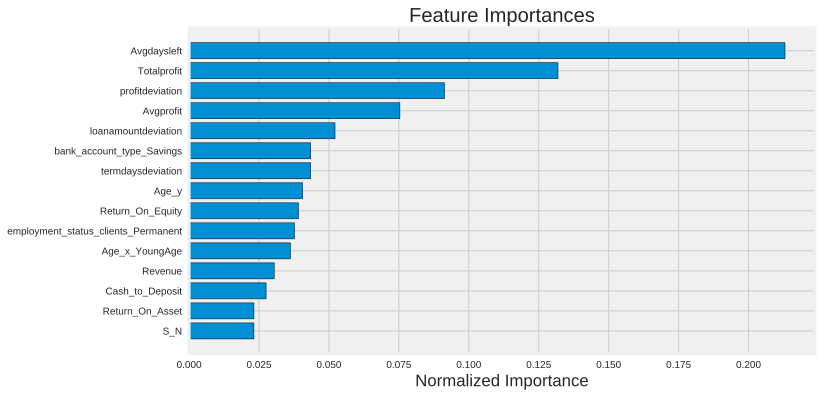

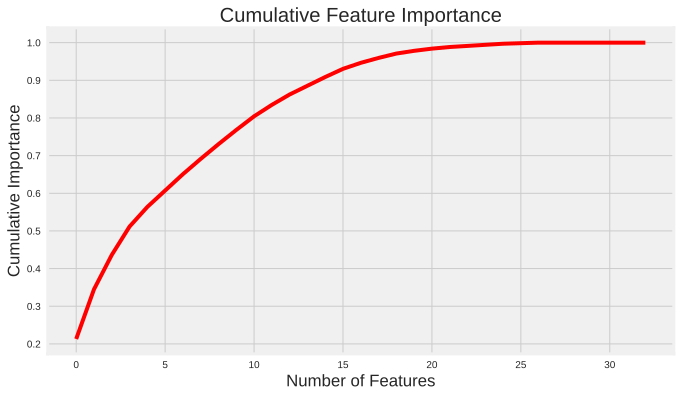

15 features required for 0.90 of cumulative importance


In [110]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [111]:
train = train.drop(columns = zero_features)
test = test.drop(columns = zero_features)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (4368, 27)
Testing shape:  (1450, 27)


At this point, we can re-run the model to see if it identifies any more features with zero importance. In a way, we are implementing our own form of recursive feature elimination.

In [112]:
def identify_zero_importance_features(train, train_labels, iterations = 2):

    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000,class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):
        
        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'auc', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [113]:
second_round_zero_features, feature_importances = identify_zero_importance_features(train, train_labels)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.668778	valid_0's binary_logloss: 0.621853
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.694201	valid_0's binary_logloss: 0.645746

There are 3 features with 0.0 importance


Now, there are no 0 importance features left. If we want to remove more features, we will create a threshold percentage of importance, such as 95%, to remove less important features.

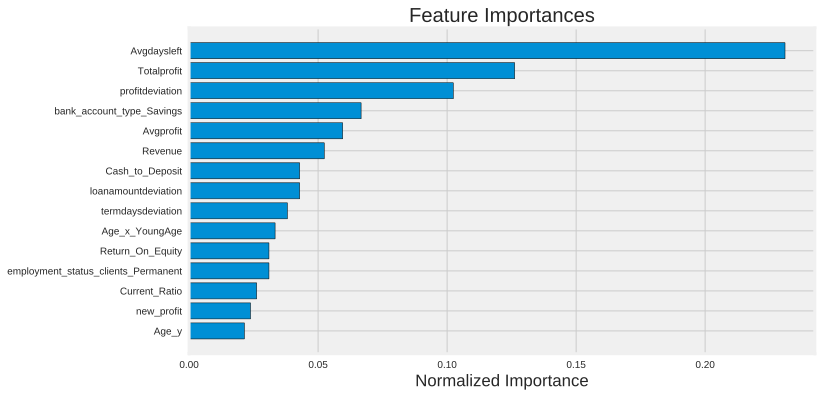

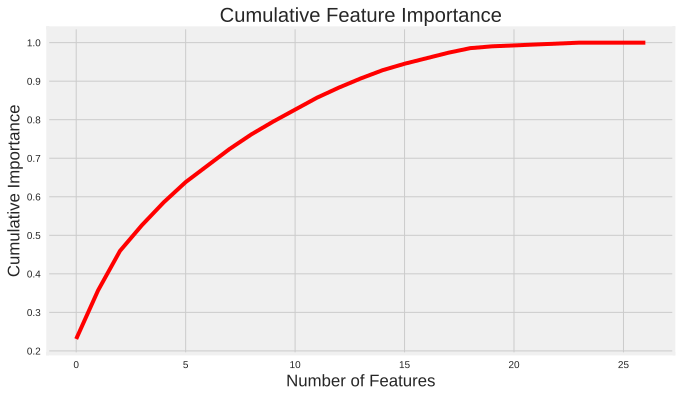

17 features required for 0.95 of cumulative importance


In [114]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

We can keep only the features needed for 95% importance.

Then, we can test both versions of the data to see if the extra feature removal step is worthwhile.

In [115]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
train_small = train[features_to_keep]
test_small = test[features_to_keep]

In [116]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
train_small = train[features_to_keep]
test_small = test[features_to_keep]

# 6.0 MODELLING

In [117]:
# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [118]:
features_sample.tail(3)

,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,employment_status_clients,level_of_education_clients,Age_x,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset
5815,8a858e9f59d692440159da2c60b42106,nan,nan,nan,-1,"20,000.00",30,"3,000.00",nan,nan,nan,Savings,Permanent,Graduate,MiddleAge,2.00,0.10,0.01,1.04,0.93,0.49,0.33,0.00,10.00,1.00,66.00,247.20,"2,750.00"
5816,8a858f0d58a18ebc0158a9bf124b5a30,nan,nan,nan,-1,"10,000.00",15,"1,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00"
5817,8a85890253e2f1180153eae33e5e6bc3,nan,nan,nan,-1,"20,000.00",30,"4,500.00",nan,nan,nan,Savings,Permanent,Graduate,YoungAge,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00"


In [119]:
features_sample_final = features_sample.copy(deep=True)

In [120]:
#Dummify the variables
# Encoding categorical variables
# create three dummy variables using get_dummies, then exclude the first dummy column
def dummify(col_name, df):
    df_dummies = pd.get_dummies(df[col_name], prefix=col_name).iloc[:, 1:] 
    return df_dummies 

In [121]:
#call the function
dummy_cols = ['bank_account_type','employment_status_clients','level_of_education_clients','Age_x']
for col_name in dummy_cols:
    dummies = dummify(col_name, features_sample_final)
    features_sample_final = pd.concat([features_sample_final, dummies], axis=1) # join the dummy columns to the original df
    features_sample_final = features_sample_final.drop([col_name], axis=1) # drop the original cat. vars column

In [122]:
features_sample_final.tail(3)

,customerid,Totalprofit,Avgprofit,Avgdaysleft,good_bad_flag,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
5815,8a858e9f59d692440159da2c60b42106,nan,nan,nan,-1,"20,000.00",30,"3,000.00",nan,nan,nan,2.00,0.10,0.01,1.04,0.93,0.49,0.33,0.00,10.00,1.00,66.00,247.20,"2,750.00",1,1,0,0,0,0,0,0,0,0,0
5816,8a858f0d58a18ebc0158a9bf124b5a30,nan,nan,nan,-1,"10,000.00",15,"1,500.00",nan,nan,nan,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00",1,1,0,0,0,0,0,0,0,0,1
5817,8a85890253e2f1180153eae33e5e6bc3,nan,nan,nan,-1,"20,000.00",30,"4,500.00",nan,nan,nan,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,0,0,0,1


In [123]:
#rename good_bad
features_sample_final.rename(columns={'good_bad_flag': 'TARGET'}, inplace=True)

In [124]:
features_sample_final.fillna(0, inplace=True)

In [125]:
features_sample_final.isnull().sum()

customerid                                  0
Totalprofit                                 0
Avgprofit                                   0
Avgdaysleft                                 0
TARGET                                      0
loanamount                                  0
termdays                                    0
new_profit                                  0
loanamountdeviation                         0
profitdeviation                             0
termdaysdeviation                           0
S_N                                         0
Return_On_Equity                            0
Return_On_Asset                             0
Current_Ratio                               0
                                           ..
Merger                                      0
Age_y                                       0
Revenue                                     0
Asset                                       0
bank_account_type_Savings                   0
employment_status_clients_Permanen

In [126]:
features_sample_final.tail(3)

,customerid,Totalprofit,Avgprofit,Avgdaysleft,TARGET,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
5815,8a858e9f59d692440159da2c60b42106,0.00,0.00,0.00,-1,"20,000.00",30,"3,000.00",0.00,0.00,0.00,2.00,0.10,0.01,1.04,0.93,0.49,0.33,0.00,10.00,1.00,66.00,247.20,"2,750.00",1,1,0,0,0,0,0,0,0,0,0
5816,8a858f0d58a18ebc0158a9bf124b5a30,0.00,0.00,0.00,-1,"10,000.00",15,"1,500.00",0.00,0.00,0.00,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00",1,1,0,0,0,0,0,0,0,0,1
5817,8a85890253e2f1180153eae33e5e6bc3,0.00,0.00,0.00,-1,"20,000.00",30,"4,500.00",0.00,0.00,0.00,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,0,0,0,1


In [127]:
train=features_sample_final[(features_sample_final['TARGET'] == 1) | (features_sample_final['TARGET'] == 0)]

In [128]:
test=features_sample_final[features_sample_final['TARGET'] < 0]

In [129]:
X = train.drop(["customerid", "TARGET"], axis=1)
print("Train Set Shape: {} Rows, {} Columns".format(*X.shape))
test = test.drop(["TARGET"], axis=1)
print("Submission Set Shape: {} Rows, {} Columns".format(*test.shape))
#y = train["TARGET"].values
y = train["TARGET"]

Train Set Shape: 4368 Rows, 33 Columns
Submission Set Shape: 1450 Rows, 34 Columns


In [130]:
X.head(3)

,Totalprofit,Avgprofit,Avgdaysleft,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
0,"1,500.00","1,500.00",-7.00,"10,000.00",15,"1,500.00",0.00,0.00,0.00,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,1,0,0,1
1,"19,500.00","4,875.00",6.25,"30,000.00",60,"9,000.00","-12,500.00","-4,125.00",-22.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,1.00,16.00,2.10,12.00,0,1,0,0,0,0,0,0,0,0,0
2,"16,500.00","2,357.14",1.00,"20,000.00",30,"4,500.00","-7,142.86","-2,142.86",-10.71,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",1,1,0,0,0,0,0,0,0,0,0


In [133]:
y

0       0
1       1
2       1
3       1
4       1
5       1
7       1
8       1
9       1
10      0
11      1
13      1
14      0
15      1
16      1
       ..
5789    1
5790    1
5793    1
5794    1
5795    1
5796    1
5801    1
5802    0
5803    1
5804    0
5805    1
5806    1
5807    0
5808    1
5809    1
Name: TARGET, Length: 4368, dtype: int64

In [132]:
#split the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

### Dummy Classifier


This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems.

The dummy classifier gives you a measure of "baseline" performance--i.e. the success rate one should expect to achieve even if simply guessing.



Suppose you wish to determine whether a given object possesses or does not possess a certain property. If you have analyzed a large number of those objects and have found that 90% contain the target property, then guessing that every future instance of the object possesses the target property gives you a 90% likelihood of guessing correctly. Structuring your guesses this way is equivalent to using the most_frequent method in the documentation you cite.

In [134]:
from sklearn.dummy import DummyClassifier

In [135]:
clf_dummy = DummyClassifier(strategy="most_frequent")
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf_dummy.fit(X_train, y_train)
clf_dummy.score(X_test, y_test)

0.7783882783882784

## Function to measure the model

In [136]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    #ax.set_facecolor("k")


### LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy score :  0.7838827838827839
Recall score   :  0.7879924953095685
classification report :
               precision    recall  f1-score   support

           0       0.07      0.62      0.12        26
           1       0.99      0.79      0.88      1066

   micro avg       0.78      0.78      0.78      1092
   macro avg       0.53      0.70      0.50      1092
weighted avg       0.97      0.78      0.86      1092



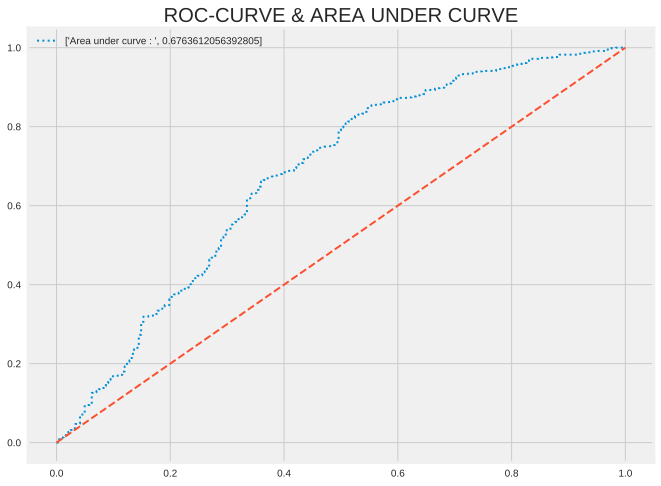

In [137]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model(logit,X_train,y_train,X_test,y_test,X_train.columns)

### Random Forest Classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.7335164835164835
Recall score   :  0.8034744842562432
classification report :
               precision    recall  f1-score   support

           0       0.25      0.36      0.30       171
           1       0.87      0.80      0.84       921

   micro avg       0.73      0.73      0.73      1092
   macro avg       0.56      0.58      0.57      1092
weighted avg       0.77      0.73      0.75      1092



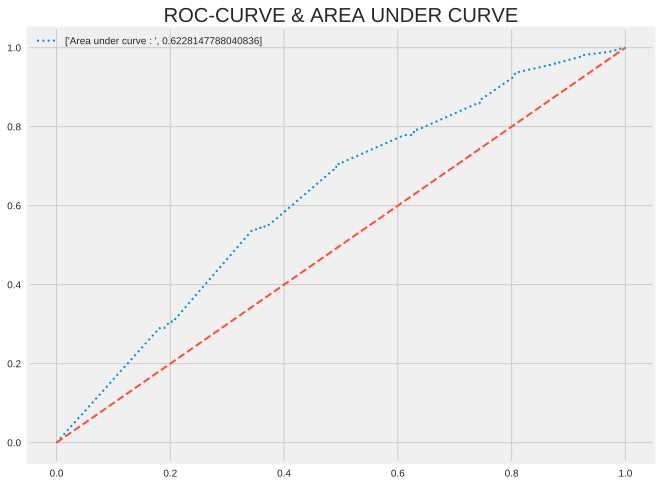

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc,X_train,y_train,X_test,y_test,X_train.columns)

### Decision Tree Classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score :  0.6895604395604396
Recall score   :  0.8074608904933814
classification report :
               precision    recall  f1-score   support

           0       0.34      0.31      0.33       261
           1       0.79      0.81      0.80       831

   micro avg       0.69      0.69      0.69      1092
   macro avg       0.56      0.56      0.56      1092
weighted avg       0.68      0.69      0.69      1092



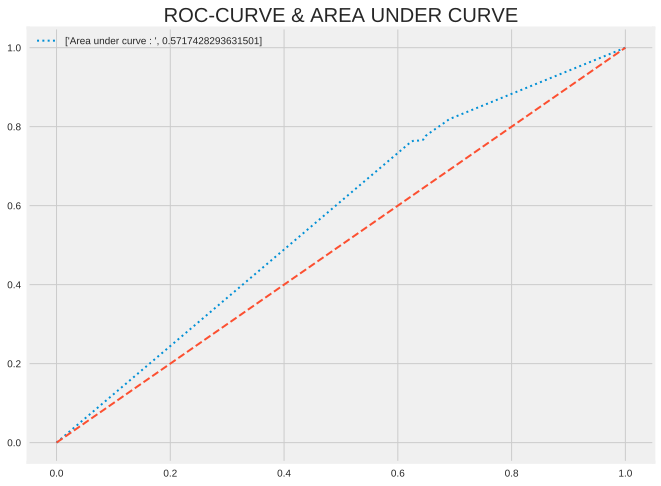

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model(dtc,X_train,y_train,X_test,y_test,X_train.columns)

### Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy score :  0.6813186813186813
Recall score   :  0.8337765957446809
classification report :
               precision    recall  f1-score   support

           0       0.48      0.34      0.40       340
           1       0.74      0.83      0.78       752

   micro avg       0.68      0.68      0.68      1092
   macro avg       0.61      0.59      0.59      1092
weighted avg       0.66      0.68      0.66      1092



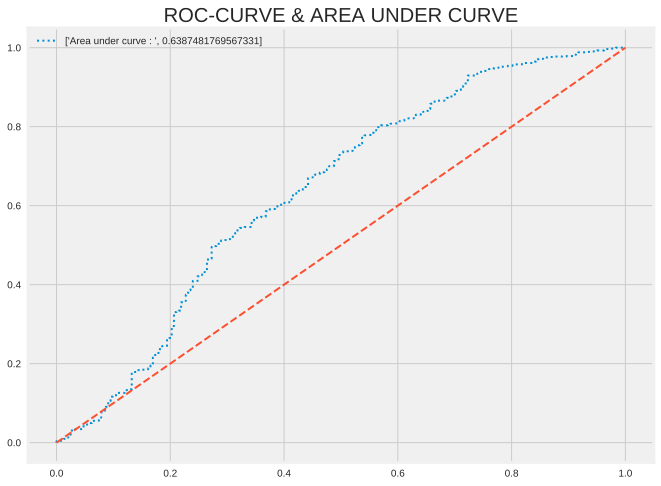

In [140]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model(gnb,X_train,y_train,X_test,y_test,X_train.columns)

### XGBoost Classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy score :  0.793040293040293
Recall score   :  0.808300395256917
classification report :
               precision    recall  f1-score   support

           0       0.20      0.60      0.30        80
           1       0.96      0.81      0.88      1012

   micro avg       0.79      0.79      0.79      1092
   macro avg       0.58      0.70      0.59      1092
weighted avg       0.91      0.79      0.84      1092



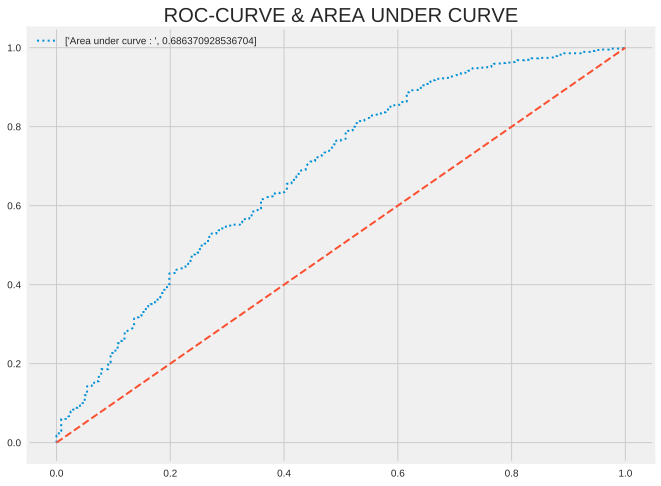

In [141]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model(xgb,X_train,y_train,X_test,y_test,X_train.columns)

### Gradient Boosting Classifier

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy score :  0.7912087912087912
Recall score   :  0.8097609561752988
classification report :
               precision    recall  f1-score   support

           0       0.21      0.58      0.31        88
           1       0.96      0.81      0.88      1004

   micro avg       0.79      0.79      0.79      1092
   macro avg       0.58      0.69      0.59      1092
weighted avg       0.90      0.79      0.83      1092



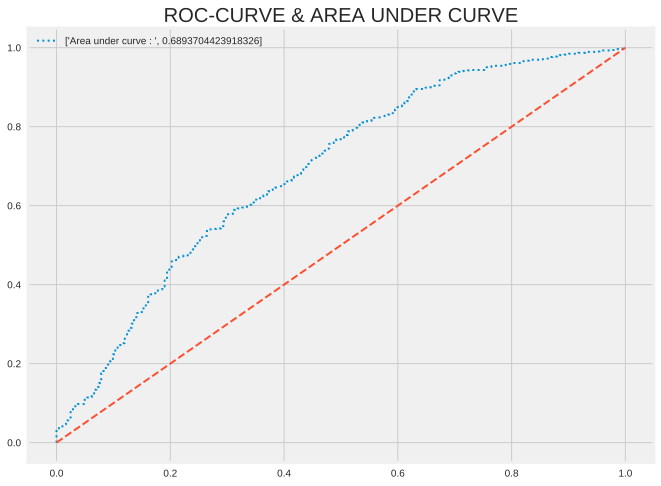

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model(gbc,X_train,y_train,X_test,y_test,X_train.columns)

# Best model is GradientBoostingClassifier with an AUC of 0.69 but in terms of accuracy it's Loistic regression with accuracy of 0.78



In [148]:
test.head()

,customerid,Totalprofit,Avgprofit,Avgdaysleft,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,S_N,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Status,Time,Merger,Age_y,Revenue,Asset,bank_account_type_Savings,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,Age_x_SeniorAge,Age_x_YoungAge
6,8a28afc7474813a40147639ec637156b,"32,900.00","3,290.00",6.00,"25,000.00",30,"2,500.00","-7,200.00",790.00,1.50,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",0,1,0,0,0,0,0,0,0,0,0
12,8a3735d5518aba7301518ac34413010d,"18,000.00","3,000.00",13.33,"20,000.00",30,"4,500.00","-8,333.33","-1,500.00",-2.50,4.00,0.24,0.04,0.99,0.82,0.71,0.32,0.00,10.00,0.00,25.00,280.10,"2,520.00",0,1,0,0,0,0,0,0,0,0,0
18,8a76e7d443e6e97c0143ed099d102b1d,"3,000.00","1,500.00",1.50,"20,000.00",30,"4,500.00","-10,000.00","-3,000.00",-15.00,3.00,0.09,0.03,1.12,0.93,0.64,0.14,0.00,10.00,0.00,25.00,432.50,"4,010.00",0,1,0,0,0,0,0,0,0,0,0
21,8a818823525dceef01525deda2480384,"39,975.00","4,441.67",0.78,"40,000.00",60,"8,000.00","-21,111.11","-3,558.33",-20.00,1.00,0.10,0.01,1.12,0.96,0.89,0.08,0.00,10.00,0.00,121.00,293.00,"4,170.00",1,0,0,1,0,0,0,0,0,0,0
23,8a818926522ea5ef01523aff15c37482,"6,000.00","3,000.00",-10.50,"20,000.00",30,"4,500.00","-10,000.00","-1,500.00",0.00,6.00,0.06,0.00,1.04,0.86,0.83,0.09,0.00,10.00,1.00,25.00,6.22,"1,750.00",1,1,0,0,0,0,0,0,1,0,0


In [149]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

ModuleNotFoundError: No module named 'yellowbrick'